<a href="https://colab.research.google.com/github/modestcamp/dspath/blob/main/01MedTenCent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Probabilidad y Estádistica*

# Introducción

En las ultimas decadas, la rama de las Ciencias Sociales ha crecido a una velocidad que podría resultar abrumadora.

Dos cambios tecnologicos han sido los causantes de este crecimiento: La primera, la **"revolución de los datos"** que no es más que un pico en la cantidad y diversidad de información disponible a causa de la disponibildiad que nos ha dado el Internet, que ha impulsado la mentalidad de decisiones orientadas a datos. La segunda, la **"revolución computacional"** que es el avance en terminos tanto de software como hardware, que se traducen en la facilidad de tener herramientas para el procesamiento de la información desde cualquier computadora, como ahora lo haremos a través de este collab. 









In [2]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

# Primero, haremos la estructura más simple para comenzar a visualizar nuestra información: Una lista
x = [8.0, 1, 2.5, 4, 28.0]
print(x)

[8.0, 1, 2.5, 4, 28.0]


In [3]:
# Segundo, hagamos un arreglo con la información creada añadueidno un eje Y

y = np.array(x)

print(y)

[ 8.   1.   2.5  4.  28. ]


In [4]:
# Ahora, estructuremoslo a la visión convencional que tenemos de una tabla:

z = pd.Series(x)

print(z)

0     8.0
1     1.0
2     2.5
3     4.0
4    28.0
dtype: float64


# Lo más Ba-sik - Tipos de medición

## Medidas de tendencia central

Ahora, para iniciar el path, y para renovar la forma en la que pensamos en nuestras cuentas a través de los datos, lo primero que tenemos que hacer es regresarnos a lo más básico de la estadista, las **medidas de tendencia central**.

*   Media Aritmetica (AM)
    *   Media Ponderada
*   Media Armónica (GM)
*   Media Geómetrica (HM)
*   Mediana
*   Moda



## Media Aritmética

La media, tambien llamda media aritmetica o simplemente promedio, es el promedio aritmetico entre todos los elementos de un conjunto de datos. La media aritmetica se expresa de la siguiente manera:

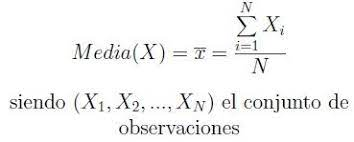

En esta imagen podemos ver visualizar donde se encuentra la media graficamente en nuestro arreglo: 
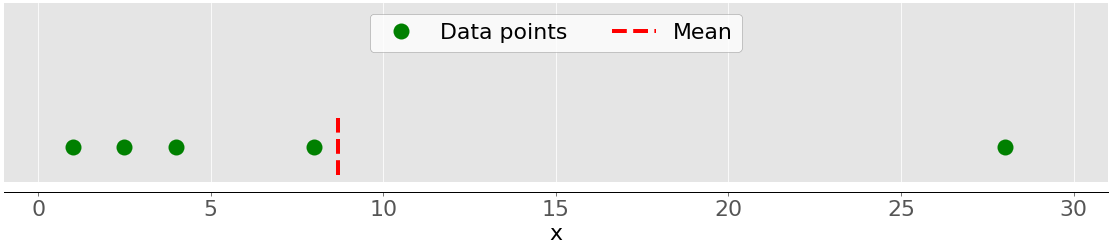

Los puntos verdes representan los puntos de nuestro arreglo y la linea roja es la media del listado o 

 (1 + 2.5 + 4 + 8 + 28) / 5 = 8.7.

 Pero, tenemos la facilidad de que con Python puro podemos calcularla de la siguiente manera: 

In [5]:
mean_ = sum (x) / len(x)

print(mean_)

8.7


O usar direcamente la función estatistica o el método .mean():

In [6]:
mean_2 = statistics.mean(x)
mean_3 = y.mean()

print(mean_2)
print(mean_3)

8.7
8.7


## Media Ponderada

La media ponderada es la generalización aritmectica de la media que nos permite definir la contribución relativa de cada dato al resultado.

Se define un peso *wi* por cada dato *xi*, donde *i* = 1,2,...,*n* y *n* es el npumero de datos en *x*. Despues multiplicas cada dato por su peso correpondiente, sumas todos los productos y divides la suma de los pesos:

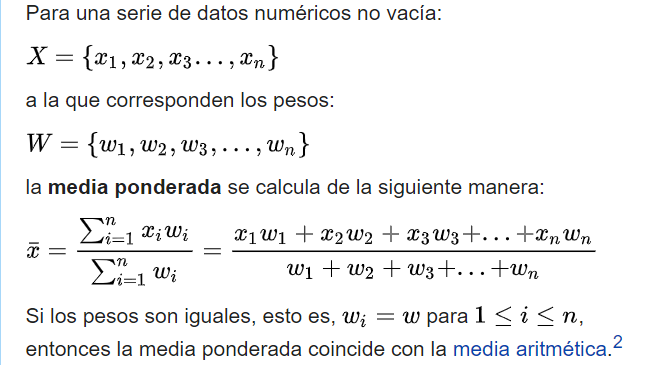

La media ponerada resulta utul cuando necesitas la media de un conjunto de datos que contiene datos especificos que ocurren con relativa freciencia. 

En este caso, igualmente podemos construir la formula con ayuda de python:


In [7]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)


6.95


O podemos usar la solución del arreglo NumPy con el metodo np.average() para tener el promedio ponderado de la media:

In [8]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

## O, como extra 

(w * y).sum() / w.sum()


6.95
6.95


6.95

## Media Armónica

La media armónica es el valor inversio de la media aritmetica de los recíprocos de dichos valores, la cual es comunmente para promediar velocidades. 

Así, dados n números x1, x2, ... , xn la media armónica será igual a:

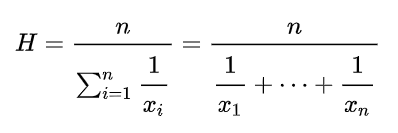

Implementada con Python puro construiriamos la formula de la siguiente manera:

In [9]:
hmean = len(x) / sum(1 / item for item in x)

print(hmean)

2.7613412228796843


Como podemos ver, el valor es vastante diferente al 8.7 de la media aritmética.

Este valor tambien se puede obtener con el metdodo statistics.hearminic_mean()

Es importante enfatizar que este metodo no funcionara si el arreglo contiene algun 0 o algun NaN.

In [10]:
hmean = statistics.harmonic_mean(x)
print(hmean)

2.7613412228796843


## Media Geométrica

La media geometrica es la raíz n-ésima del producto de todas los elementos n dentro de xi en un conjunto de datos, la formula se ve así: 

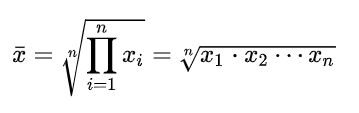

Ok, ¿y eso cómo se come o k?

En el siguiente gráfico podemos visualizar la forma en la que se comportan las diferentes medias en nuestro conjunto de datos:

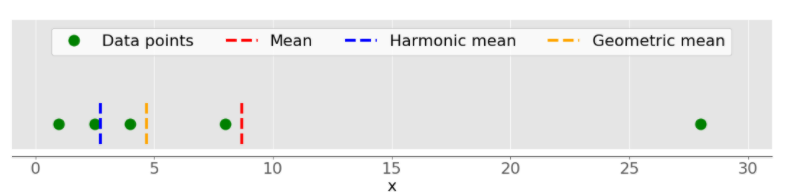

Esta se usa comunmente cuando se comparan diferentes aspectos del conjunto de datos, cuyos rendimientos tienen unidades de medida en diferentes rangos numéricos. *cof modelos de atribución cof*.

Esta media se puede entender en términos geométricos. La edia de dos números *a* y *b*, es la longitud del lado de u cuadrante cuya área es igual a área de un rectángulo con lados de longitudes **a** y **b**.

Ahora, construyamos este valor en Python:

In [11]:
multiplyValues =  8*1*2.5*4*28
n = 5

gmean = (multiplyValues)**(1/n)
print(gmean)

4.677885674856041


## Mediana

La **mediana** es el elemento medio de un conjunto de datos ordenado. Este conjunto puede ser ordenado de manera creciente o decreciente. Si el número de elementos en el conjunto es umar,  entonces la mediana es el valor en la posición media: 0.5 (𝑛 + 1). Si 𝑛 es par, entonces la mediana es la media aritmética de los dos valores en el medio, es decir, los elementos en las posiciones 0.5𝑛 y 0.5𝑛 + 1.

Por ejemplo, si tiene los puntos de datos 2, 4, 1, 8 y 9, entonces el valor mediano es 4, que está en el medio del conjunto de datos ordenado (1, 2, 4, 8, 9). Si los puntos de datos son 2, 4, 1 y 8, entonces la mediana es 3, que es el promedio de los dos elementos intermedios de la secuencia ordenada (2 y 4). La siguiente figura ilustra esto:

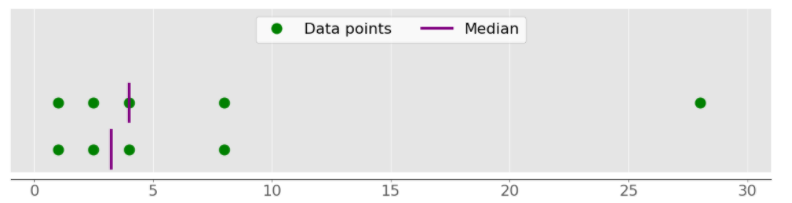

O, en el ejemplo de la lista que hemos estado manejando (1, 2.5, 4, 8 y 28):

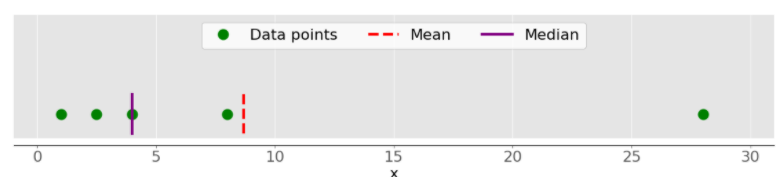

La principal diferencia entre el comportamiento de la media y la mediana está relacionada con los valores **atípicos** o **extremos** del conjunto de datos. La media se ve muy afectada por los valores atípicos, pero la mediana solo depende de los valores atípicos, ya sea levemente o nada. Considere la siguiente figura:

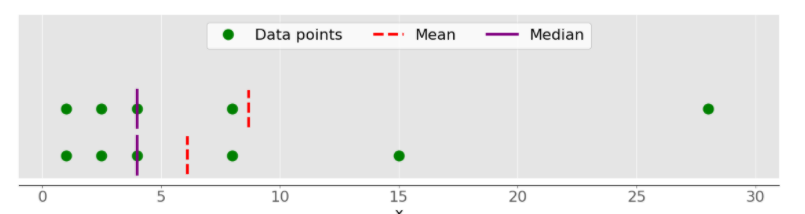


El conjunto de datos superior nuevamente tiene los elementos 1, 2.5, 4, 8 y 28. Su media es 8.7 y la mediana es 5, como viste anteriormente. El conjunto de datos inferior muestra lo que sucede cuando mueves el punto más a la derecha con el valor 28:

*   **Si aumenta su valor (muévalo hacia la derecha)**, la media aumentará, pero el valor mediano nunca cambiará.
*   **Si disminuye su valor (muévalo hacia la izquierda)**, la media disminuirá, pero la mediana seguirá siendo la misma hasta que el valor del punto móvil sea mayor o igual a 4.

Ahora, una de las posibles formas de observar la media a través de Python es la siguiente:

In [12]:
n = len(x)
if n % 2:
     median_ = sorted(x)[round(0.5*(n-1))]
else:
     x_ord, index = sorted(x), round(0.5 * n)
     median_ = 0.5 * (x_ord[index-1] + x_ord[index])

print(median_)

4


Los dos puntos más importantes para dicha implementación son los siguientes:



1.   **Ordenar** los elementos del conjunto de datos
2.   **Encontrar el(los) elemento(s) intermedio(s)** en el conjunto de datos ordenados

Igual podemos encontrarla usando el método statistics.median()



In [13]:
median_ = statistics.median(x)
print(median_)

median_2 = statistics.median(x[:-1])
print(median_2)


4
3.25



La versión ordenada de x es [1, 2.5, 4, 8.0, 28.0], por lo que el elemento del medio es 4. La versión ordenada de x [: - 1], que es x sin el último elemento 28.0, es [1 , 2,5, 4, 8,0]. Ahora, hay dos elementos intermedios, 2.5 y 4. Su promedio es 3.25.

Los métodos median_low() y median_hig() son dos funciones más relacionadas con la mediana en la biblioteca de statistics de Python. Siempre devuelven un elemento del conjunto de datos:

* **Si el número de elementos es impar**, entonces hay un solo valor medio, por lo que estas funciones se comportan como median().
* **Si el número de elementos es par**, entonces hay dos valores medios. En este caso, median_low() devuelve el valor medio más bajo y median_high() el más alto.


In [15]:
a = statistics.median_low(x[:-1])
print(a)

b = statistics.median_high(x[:-1])
print(b)

2.5
4


Nuevamente, la versión ordenada de x [: - 1] es [1, 2.5, 4, 8.0]. Los dos elementos del medio son 2,5 (bajo) y 4 (alto).


Otra posibilidad para obtenerlo es con el metodo np.median() que nos dara los mismos valores que el metodo statistics,median():

In [16]:
median_3 = np.median(y)
print(median_3)

median_4 = np.median(y[:-1])
print(median_4)

4.0
3.25


## Moda

La moda es el dato que con más ocurrencias dentro de una muestra. En caso de que no exista un dato único que cumpla dicha premisa el conjunto de datos será multimodal. Por ejemplo, en el conjunto que contiene los puntos 2, 3, 2, 8 y 12, el número 2 es la moda porque ocurre dos veces, a diferencia de los otros elementos que ocurren solo una vez.

Así se puede ver la moda en Python vanilla:


In [20]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
print(mode_)


2


Esta tambien se puede obtener con el paquete statistics con el metodo statistics.mode() y statistics.multimode():




In [22]:
mode_1 = statistics.mode(u)
print(mode_1)


2


De igual manera se puede obtener con spicy.stats.mode():


In [27]:
v = [12, 15, 12, 15, 21, 15, 12]
u, v = np.array(u), np.array(v)
mode_3 = scipy.stats.mode(u)
print(mode_3)

mode_4 = scipy.stats.mode(v)
print(mode_4)


ModeResult(mode=array([2]), count=array([2]))
ModeResult(mode=array([12]), count=array([3]))


Esta función devuelve el objeto con el valor modal y la cantidad de veces que ocurre. Si hay varios valores modales en el conjunto de datos, solo se devuelve el valor más pequeño.


# Experimentos iniciales

El dataset que ocuparemos para el repaso es un listado de los usuarios del infame Titanic, este por su tamaño y disponibilidad nos ayudara a aclarar diversos tópicos relativos estadistica. 

Su estructura es la siguiente:

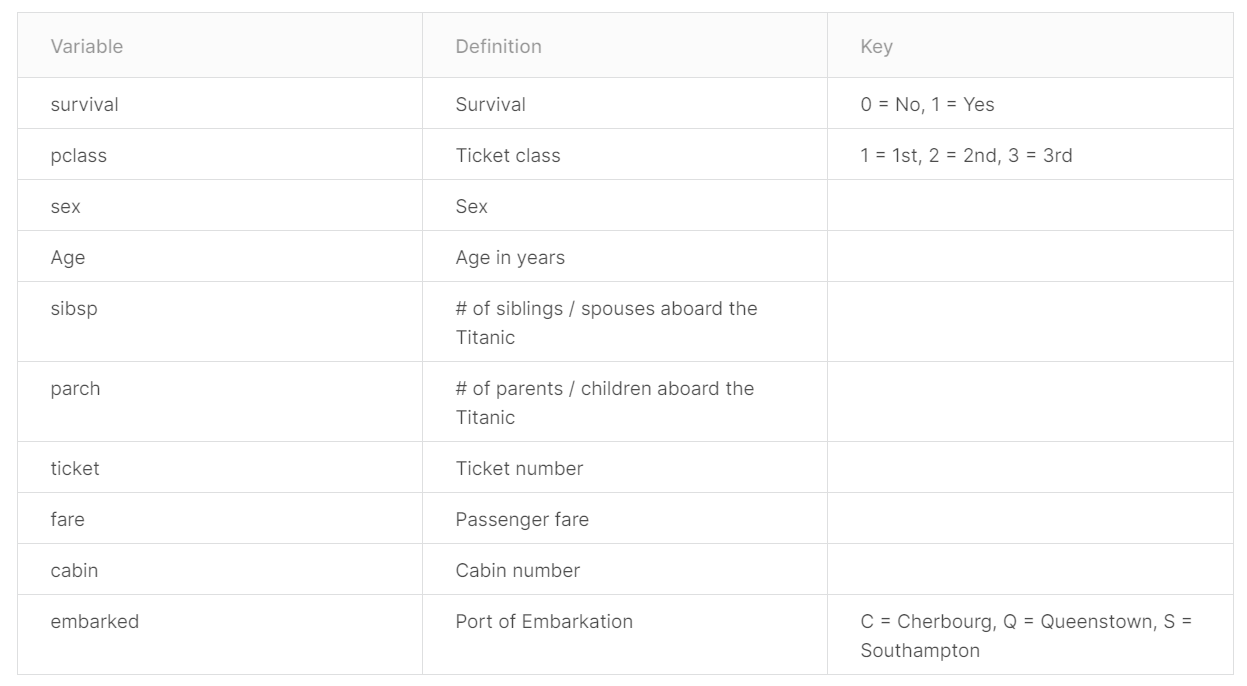

Al hacer un zoom a las primeras 5 filas lo que podremos observar es que tienen una mezcla de datos númeric (PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare), categoricos (Sex, Cabin, Embarked), y texto (Name, Ticket).


Lo primero que haremos es hacer hacer una **muestra** con los datos más sencillos a tratar pero que mantengan la escencia estadustuca de la **población**


In [29]:
# Importamos el primer paquete necesario
import pandas as pd

# Asignamos el los datos a un objeto llamado "data"
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Path/titanic.csv')

# Verificamos la dimensión de la tabla
print("La dimensión de esta tabla es: ", data.shape)

La dimensión de esta tabla es:  (891, 12)


In [ ]:
# Revisamos las primeras 5 filas para conocer la estructura
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
